# Iris Dataset Neural Network Classification

A simple Iris Dataset classifier using PyTorch

## Import Required Libraries

In [1]:
# Data processing
import pandas as pd
import numpy as np

# PyTorch modules
import torch
import torch.nn as nn

# sklearn modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Visualizations
import matplotlib.pyplot as plt

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

RANDOM_STATE = 1

## Iris Dataset Cleaning and Processing

In [3]:
# Read dataset
iris_df = pd.read_csv('data/Iris.csv')

iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Brief EDA
print(iris_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
# Brief EDA
print(f'Shape: {iris_df.shape}\n')
print(f'Null entries:\n{iris_df.isnull().sum()}')

Shape: (150, 6)

Null entries:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
# Remove ID column
iris_df.drop(['Id'], axis=1, inplace=True)

In [7]:
# All unique target variables
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
# Perform label encoding for target variables
encoding = {'Iris-setosa': 0,
            'Iris-versicolor': 1, 
            'Iris-virginica': 2}

iris_df['Species'] = iris_df['Species'].map(encoding)

iris_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Create Training and Testing Dataset

In [9]:
# Predictor and target variables
X = iris_df.drop(['Species'], axis=1).values
y = iris_df['Species'].values

In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=RANDOM_STATE)

In [11]:
# Scale predictor variables
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# Converting from numpy to tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Create Neural Network Model

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_input_size, hidden_output_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_input_size)
        self.hidden_layer1 = nn.Linear(hidden_input_size, hidden_output_size)
        self.output_layer = nn.Linear(hidden_output_size, num_classes)
        self.relu = nn.ReLU()
    
    
    def forward(self, x):
        out = self.relu(self.input_layer(x))
        out = self.relu(self.hidden_layer1(out))
        out = self.output_layer(out)
        return out

In [14]:
# input_dim = 4 because we have 4 inputs namely sepal_length,sepal_width,petal_length,petal_width
# output_dim = 3 because we have namely 3 categories setosa,versicolor and virginica

input_size  = 4
hidden_input_size = 128
hidden_output_size = 64
num_classes = 3

model = NeuralNet(input_size, hidden_input_size, hidden_output_size, num_classes)

In [15]:
# Creating our optimizer and loss function object
learning_rate = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [16]:
num_epochs = 1000
learning_rate = 0.001

train_losses = np.zeros(num_epochs)
test_losses  = np.zeros(num_epochs)

In [17]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    
    # Calculate training loss
    loss_train = criterion(outputs, y_train)

    # Backward propagation: calculate gradients
    loss_train.backward()

    # Update the weights
    optimizer.step()
    
    # Clear out the gradients for the next step
    optimizer.zero_grad()

    # Predict test; Calculate test loss
    output_test = model(X_test)
    loss_test = criterion(output_test, y_test)

    train_losses[epoch] = loss_train.item()
    test_losses[epoch] = loss_test.item()

    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.0188, Test Loss: 0.2366
Epoch 100/1000, Train Loss: 0.0014, Test Loss: 0.3793
Epoch 150/1000, Train Loss: 0.0004, Test Loss: 0.4278
Epoch 200/1000, Train Loss: 0.0002, Test Loss: 0.4462
Epoch 250/1000, Train Loss: 0.0001, Test Loss: 0.4621
Epoch 300/1000, Train Loss: 0.0001, Test Loss: 0.4757
Epoch 350/1000, Train Loss: 0.0001, Test Loss: 0.4864
Epoch 400/1000, Train Loss: 0.0000, Test Loss: 0.4973
Epoch 450/1000, Train Loss: 0.0000, Test Loss: 0.5058
Epoch 500/1000, Train Loss: 0.0000, Test Loss: 0.5138
Epoch 550/1000, Train Loss: 0.0000, Test Loss: 0.5202
Epoch 600/1000, Train Loss: 0.0000, Test Loss: 0.5268
Epoch 650/1000, Train Loss: 0.0000, Test Loss: 0.5324
Epoch 700/1000, Train Loss: 0.0000, Test Loss: 0.5378
Epoch 750/1000, Train Loss: 0.0000, Test Loss: 0.5430
Epoch 800/1000, Train Loss: 0.0000, Test Loss: 0.5482
Epoch 850/1000, Train Loss: 0.0000, Test Loss: 0.5532
Epoch 900/1000, Train Loss: 0.0000, Test Loss: 0.5583
Epoch 950/1000, Train Loss: 0

# Model Performance

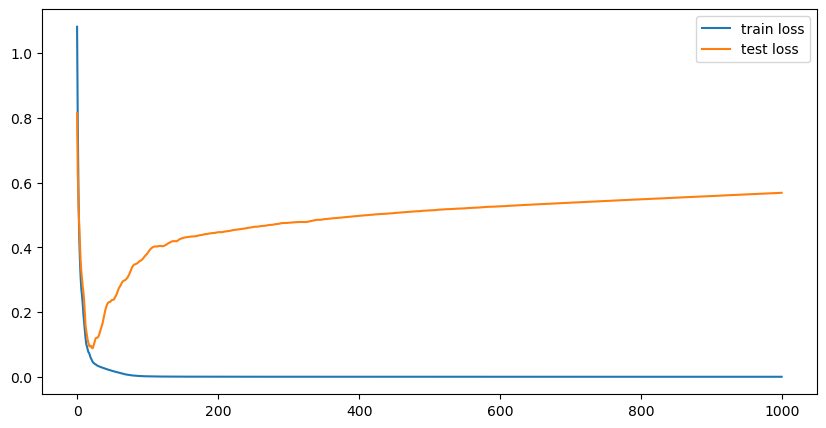

In [20]:
plt.figure(figsize=(10,5))

plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [26]:
predictions_train = []
predictions_test =  []

with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [63]:
# Get performance accuracy
def get_accuracy(y_predict, y_test):    
    _, predicted = torch.max(y_predict, 1)
    predicted = np.array(predicted)
    
    y_test = np.array(y_test)
    
    n_samples = y_predict.size(0)
    n_correct = np.count_nonzero(predicted == y_test)
        
    return n_correct / n_samples

In [67]:
print(f'Training accuracy: {get_accuracy(predictions_train, y_train)}')
print(f'Test accuracy: {get_accuracy(predictions_test, y_test)}')

Training accuracy: 1.0
Test accuracy: 0.9555555555555556
